In [1]:
!apt-get update
!apt-get install -y poppler-utils
! pip install pdf2image byaldi qwen-vl-utils bitsandbytes

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,225 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InReleas

PDFを読み込んでいます: sample.pdf


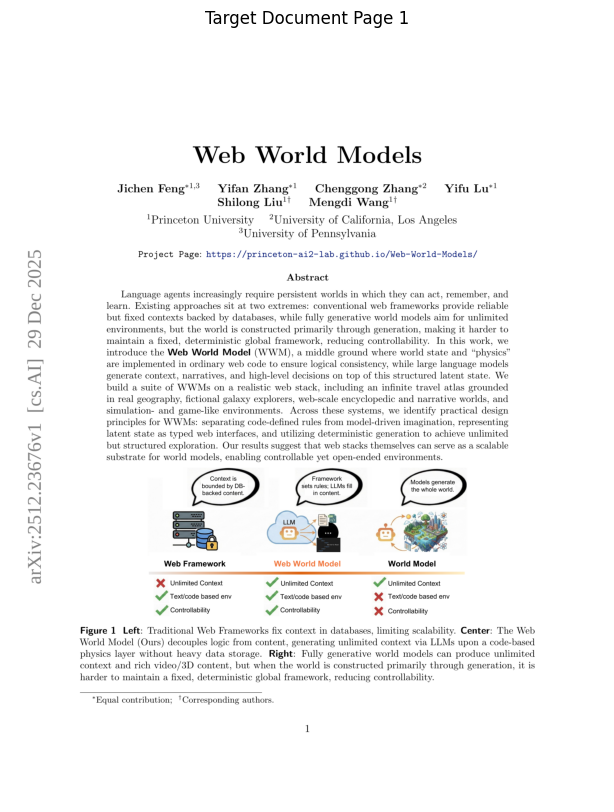

全ページ：34ページ


In [2]:
import os
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# 任意のPDFパス
pdf_path = "sample.pdf"

# ファイルがない場合の処理
if not os.path.exists(pdf_path):
    print(f"{pdf_path}が指定されたPDFファイルが存在しません。")
else:
    print(f"PDFを読み込んでいます: {pdf_path}")

    # PDFの1ページ目を画像に変換して表示
    images = convert_from_path(pdf_path)
    sample_image = images[0]

    plt.figure(figsize=(10, 10))
    plt.imshow(sample_image)
    plt.axis('off')
    plt.title("Target Document Page 1")
    plt.show()

    print(f"全ページ：{len(images)}ページ")

In [3]:
from byaldi import RAGMultiModalModel

# Load a Model
RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=0)

# インデックスの作成
index_name = "my_pdf_index"

print("Indexing start...")

RAG.index(
    input_path=pdf_path,
    index_name=index_name,
    store_collection_with_index=True,
    overwrite=True
)
print("Indexing done.")

`torch_dtype` is deprecated! Use `dtype` instead!


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

Indexing start...
Indexing done.


Query: このドキュメントに記されている図は何を示していますか？
Top Result Score: 10.9375
Retrieved Page ID: 0, Page Index: 2


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12517 (\N{KATAKANA LETTER SMALL YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

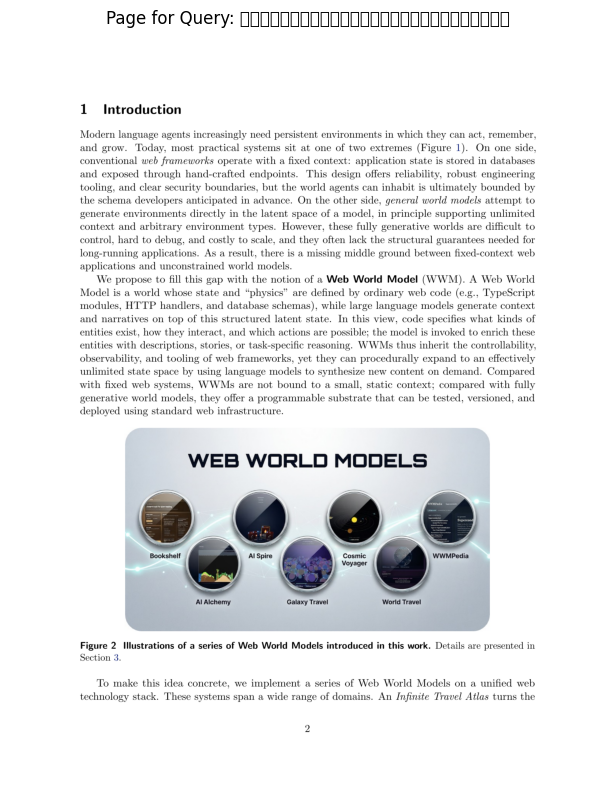

In [4]:
# 検索クエリ
query_text = "このドキュメントに記されている図は何を示していますか？"

# 検索実行
results = RAG.search(query_text, k=1)

# 検索結果
print(f"Query: {query_text}")
print(f"Top Result Score: {results[0].score:.4f}")
print(f"Retrieved Page ID: {results[0].doc_id}, Page Index: {results[0].page_num}")

# ヒットしたページの画像を取得
page_index = results[0].page_num - 1
retrieved_image_content = images[page_index]

# 検索されたページを可視化
plt.figure(figsize=(10, 10))
plt.imshow(retrieved_image_content)
plt.axis('off')
plt.title(f"Page for Query: {query_text}")
plt.show()

In [5]:
import gc
import torch

# メモリの掃除

# Retrieverモデルをメモリから削除
del RAG
del results
gc.collect()
torch.cuda.empty_cache()

print("VRAM Cleaned!")

VRAM Cleaned!


In [6]:
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor, BitsAndBytesConfig
from qwen_vl_utils import process_vision_info

# メモリ不足対策：4bit量子化
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

# Generator model
gen_model_name = "Qwen/Qwen2-VL-7B-Instruct"

print(f"Loading generator: {gen_model_name}")
model = Qwen2VLForConditionalGeneration.from_pretrained(
    gen_model_name,
    quantization_config=quantization_config,
    device_map="auto",
    torch_dtype=torch.float16
)

# Processor
processor = AutoProcessor.from_pretrained(gen_model_name)

# 検索された画像を入力として与える
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": retrieved_image_content,
            },
            {"type": "text", "text":f"与えられた画像を元に、次の質問を詳しく答えてください。: {query_text}"},
        ],
    }
]

Loading generator: Qwen/Qwen2-VL-7B-Instruct


config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

In [7]:
# 推論の準備
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
).to("cuda")

# 生成実行
print("Generating...")
generated_ids = model.generate(**inputs, max_new_tokens=512)
generate_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generate_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

print("-" * 30)
print("[AI Answer]")
print(output_text[0])
print("-" * 30)

Generating...
------------------------------
[AI Answer]
このドキュメントに記されている図は、「Web World Models」を示しています。この図は、異なるWeb World Modelsの例を示しています。これらのモデルは、異なるドメインをカバーしており、それぞれのモデルがどのように機能するかを示しています。具体的には、「Bookshelf」、「AI Spire」、「Cosmic Voyager」、「Galaxy Travel」、「World Travel」、「AI Alchemy」、「WWMPedia」などがあります。
------------------------------
